In [1]:
!pip install kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:10<00:00, 145MB/s]
100% 812M/812M [00:10<00:00, 80.6MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [9]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ",file_count)


Number of images:  25000


In [14]:
file_name = os.listdir('/content/train')
#Print file_name
for i in range(11):
  print(file_name[i])

dog.2767.jpg
cat.6621.jpg
dog.8625.jpg
cat.11633.jpg
dog.9645.jpg
cat.466.jpg
cat.11298.jpg
cat.2796.jpg
cat.2049.jpg
cat.8647.jpg
cat.3037.jpg


In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

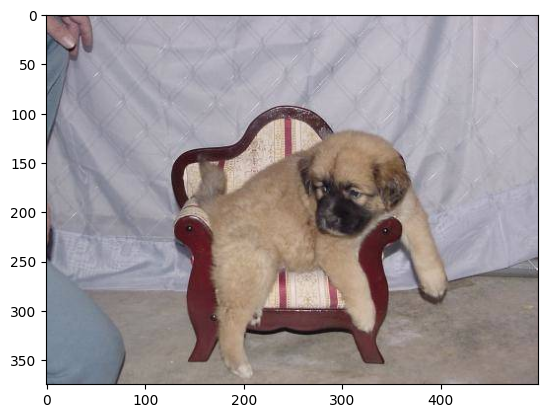

In [24]:
img = mpimg.imread('/content/train/dog.2767.jpg')
plt.imshow(img)


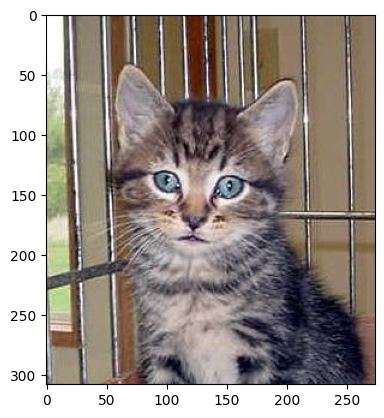

In [27]:
img = mpimg.imread('/content/train/cat.6621.jpg')
plt.imshow(img)


In [18]:
file_name = os.listdir('/content/train')

for i in range(5):
  name = file_name[i]
  # print(name)
  print(name[0:3])

dog
cat
dog
cat
dog


In [19]:
file_name = os.listdir('/content/train')

dog_count = 0
cat_count = 0
for img_file in file_name:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images: ",dog_count)
print("Number of cat images: ", cat_count)

Number of dog images:  12500
Number of cat images:  12500


In [20]:
#creating a directory for resized images

In [21]:
os.mkdir('/content/image resized')

In [22]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")

  newImgPath = resized_folder + filename
  img.save(newImgPath)

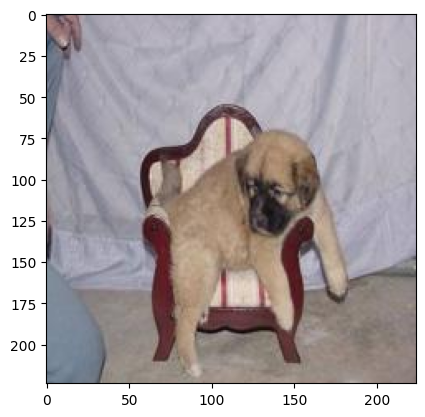

In [25]:
#display resized dog images

img = mpimg.imread('/content/image resized/dog.2767.jpg')
plt.imshow(img)
plt.show()

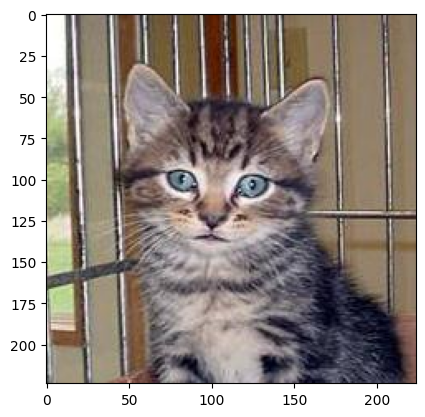

In [28]:
img = mpimg.imread('/content/image resized/cat.6621.jpg')
plt.imshow(img)


###Creating labels for reseized images of dogs and cats

Cat->0

Dog->1

In [29]:

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [30]:
print(filenames[0:5])
print(len(filenames))

['dog.2767.jpg', 'cat.6621.jpg', 'dog.8625.jpg', 'cat.11633.jpg', 'dog.9645.jpg']
2000


In [31]:
print(labels[0:5])

print(len(labels))

[1, 0, 1, 0, 1]
2000


In [32]:
# counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


In [33]:
#Converting all the resized images to numpy arrays


In [34]:
import cv2
import glob

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files=[]
[files.extend(glob.glob(image_directory + '*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
# print(dog_cat_images)

# To streamline the code and minimize its length, I refrained from utilizing the print command.

In [37]:
type(dog_cat_images)

numpy.ndarray

In [38]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [39]:
X = dog_cat_images
Y = np.asarray(labels)

In [40]:
#Train test split

In [41]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)


(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> training images

400 -> test images

In [43]:
#Scaling data between 0-1


In [44]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [46]:
# print(X_train_scaled)

# Again to streamline the code and minimize its length, I refrained from utilizing the print command.

In [ ]:
#Building the Neural Network


In [47]:
import tensorflow as tf
import tensorflow_hub as hub

In [48]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [49]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [50]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [51]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 64s 1s/step - loss: 0.1782 - acc: 0.9306
Epoch 2/5
50/50 [==============================] - 55s 1s/step - loss: 0.0583 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 54s 1s/step - loss: 0.0442 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 57s 1s/step - loss: 0.0346 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 59s 1s/step - loss: 0.0277 - acc: 0.9931


In [52]:
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test Loss =',score)
print("Test Accuracy =",acc)

13/13 [==============================] - 19s 1s/step - loss: 0.0640 - acc: 0.9750
Test Loss = 0.06399095058441162
Test Accuracy = 0.9750000238418579


Path of the image to be predicted: /content/dog.jpg


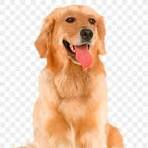

1/1 [==============================] - 1s 576ms/step
[[-3.351731   3.6454635]]
1
The image represents a Dog


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)  #Checks max probability

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


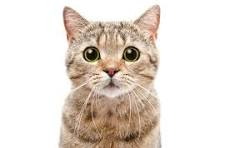

1/1 [==============================] - 0s 54ms/step
[[ 3.2592776 -4.0593705]]
0
The image represents a Cat


In [54]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)  #Checks max probability

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/Alike.jpg


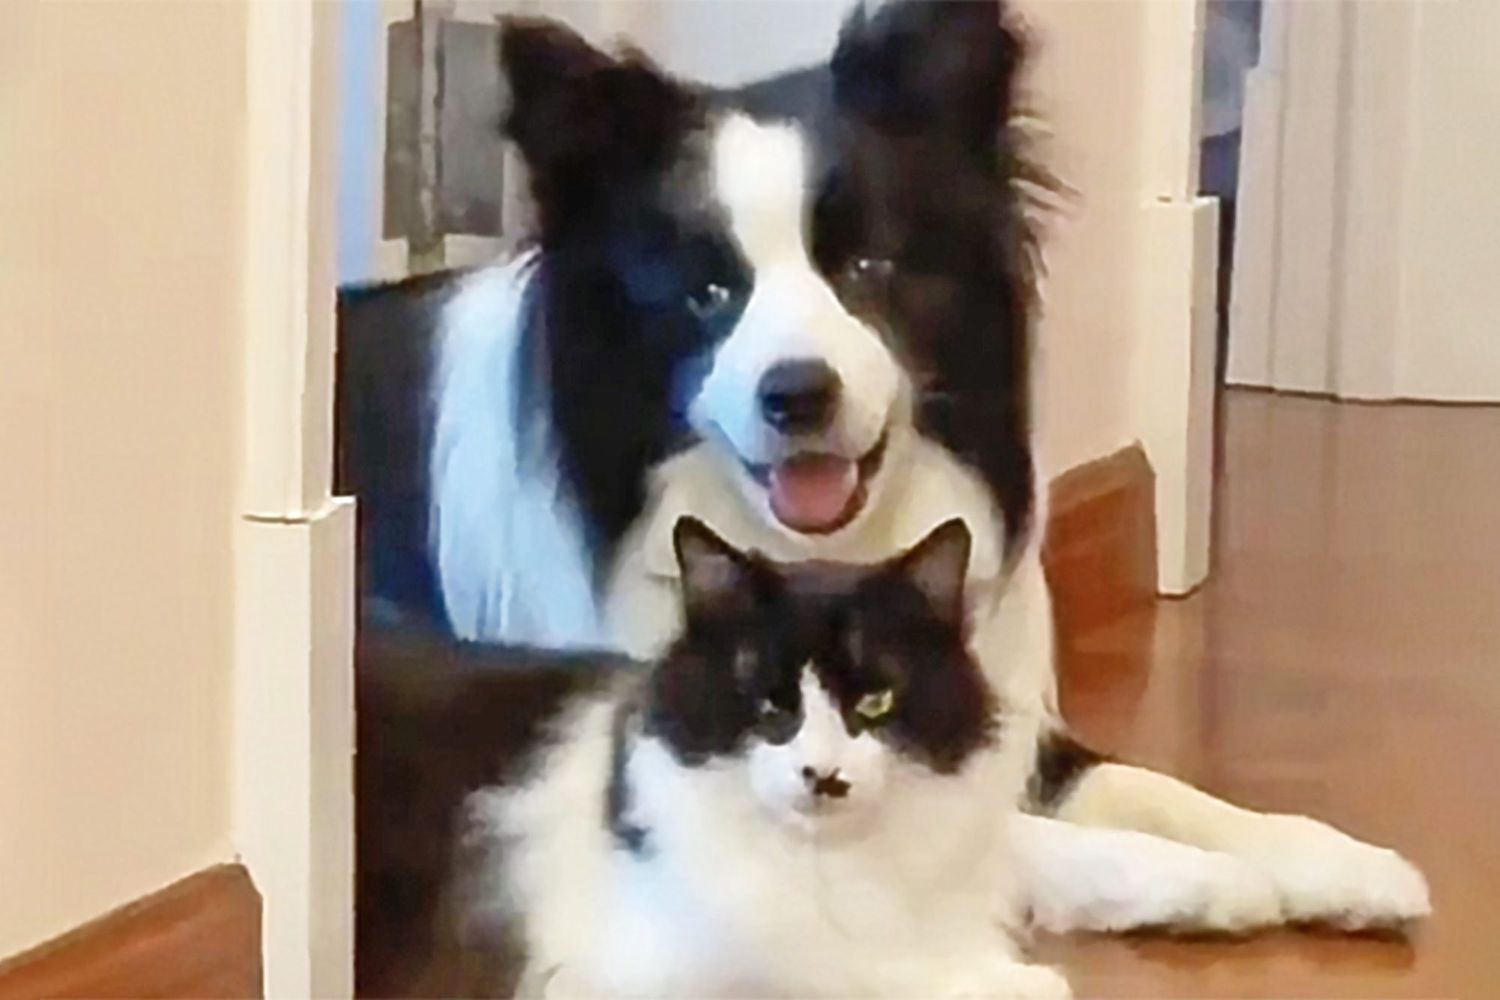

1/1 [==============================] - 0s 85ms/step
[[-0.74845135 -0.7477111 ]]
1
The image represents a Dog


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)  #Checks max probability

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')